<a href="https://colab.research.google.com/github/kavrangraves/AAI501-M7-PPC-Project/blob/main/Team_3_Room_Occupancy_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#############################################################################################
## **AAI-530**                                                                                 #
## **Final Project - Team** 3                                                                  #
## **Room Occupancy Count IoT Edge Hybrid device by LEVEL3, Model 2.0 (Single Sensors)**        
#############################################################################################

## This entire section includes the various calculations of an existing dataset, to evaluate the accuracy of predictions based on the sensor's data, and to decide if we can scale down the amount of sensors required so we can produce a lower cost IoT device.

### Original model 1.0 that this is its dataset uses multiple same sensors, 4 Temp, 4 Sound, 4 Light, 2 PIR, 1 CO2
### Model 2.0 that we are suggesting and testing will use only 1 sensor of each.

## New Section
 **Load the dataset and Data Cleaning and EDA with Time Series Data**



https://www.kaggle.com/datasets/ananthr1/room-occupancy-estimation-data-set

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import keras
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
#Import Model 1.0 dataset (Multiple sensors)
df_raw = pd.read_csv("/content/Team3-Occupancy_Estimation.csv", delimiter = ",")

In [ ]:
#Check df
df_raw.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,12/22/2017,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,12/22/2017,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,12/22/2017,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,12/22/2017,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,12/22/2017,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [ ]:
#Describe field info
df_raw.describe()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
count,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.00000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000
mean,25.454012,25.546059,25.056621,25.754125,25.445059,26.01629,34.248494,13.220259,0.168178,0.120066,0.158119,0.103840,460.860401,-0.004830,0.090137,0.079574,0.398559
std,0.351351,0.586325,0.427283,0.356434,51.011264,67.30417,58.400744,19.602219,0.316709,0.266503,0.413637,0.120683,199.964940,1.164990,0.286392,0.270645,0.893633
min,24.940000,24.750000,24.440000,24.940000,0.000000,0.00000,0.000000,0.000000,0.060000,0.040000,0.040000,0.050000,345.000000,-6.296154,0.000000,0.000000,0.000000
25%,25.190000,25.190000,24.690000,25.440000,0.000000,0.00000,0.000000,0.000000,0.070000,0.050000,0.060000,0.060000,355.000000,-0.046154,0.000000,0.000000,0.000000
50%,25.380000,25.380000,24.940000,25.750000,0.000000,0.00000,0.000000,0.000000,0.080000,0.050000,0.060000,0.080000,360.000000,0.000000,0.000000,0.000000,0.000000
75%,25.630000,25.630000,25.380000,26.000000,12.000000,14.00000,50.000000,22.000000,0.080000,0.060000,0.070000,0.100000,465.000000,0.000000,0.000000,0.000000,0.000000
max,26.380000,29.000000,26.190000,26.560000,165.000000,258.00000,280.000000,74.000000,3.880000,3.440000,3.670000,3.400000,1270.000000,8.980769,1.000000,1.000000,3.000000


In [ ]:
#Review dtypes of fields
df_raw.dtypes

Date                     object
Time                     object
S1_Temp                 float64
S2_Temp                 float64
S3_Temp                 float64
S4_Temp                 float64
S1_Light                  int64
S2_Light                  int64
S3_Light                  int64
S4_Light                  int64
S1_Sound                float64
S2_Sound                float64
S3_Sound                float64
S4_Sound                float64
S5_CO2                    int64
S5_CO2_Slope            float64
S6_PIR                    int64
S7_PIR                    int64
Room_Occupancy_Count      int64
dtype: object

In [64]:
#make a copy to assign to df
df = df_raw.copy()
df_MLP = df_raw.copy()
df_LSTM = df_raw.copy()
df_LR = df_raw.copy()

Outlier detection

In [65]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
S1_Temp,10129.0,25.454012,0.351351,24.940000,25.190000,25.38,25.63,26.380000
S2_Temp,10129.0,25.546059,0.586325,24.750000,25.190000,25.38,25.63,29.000000
S3_Temp,10129.0,25.056621,0.427283,24.440000,24.690000,24.94,25.38,26.190000
S4_Temp,10129.0,25.754125,0.356434,24.940000,25.440000,25.75,26.00,26.560000
S1_Light,10129.0,25.445059,51.011264,0.000000,0.000000,0.00,12.00,165.000000
S2_Light,10129.0,26.016290,67.304170,0.000000,0.000000,0.00,14.00,258.000000
S3_Light,10129.0,34.248494,58.400744,0.000000,0.000000,0.00,50.00,280.000000
S4_Light,10129.0,13.220259,19.602219,0.000000,0.000000,0.00,22.00,74.000000
S1_Sound,10129.0,0.168178,0.316709,0.060000,0.070000,0.08,0.08,3.880000
S2_Sound,10129.0,0.120066,0.266503,0.040000,0.050000,0.05,0.06,3.440000


Look for missing data

<AxesSubplot:>

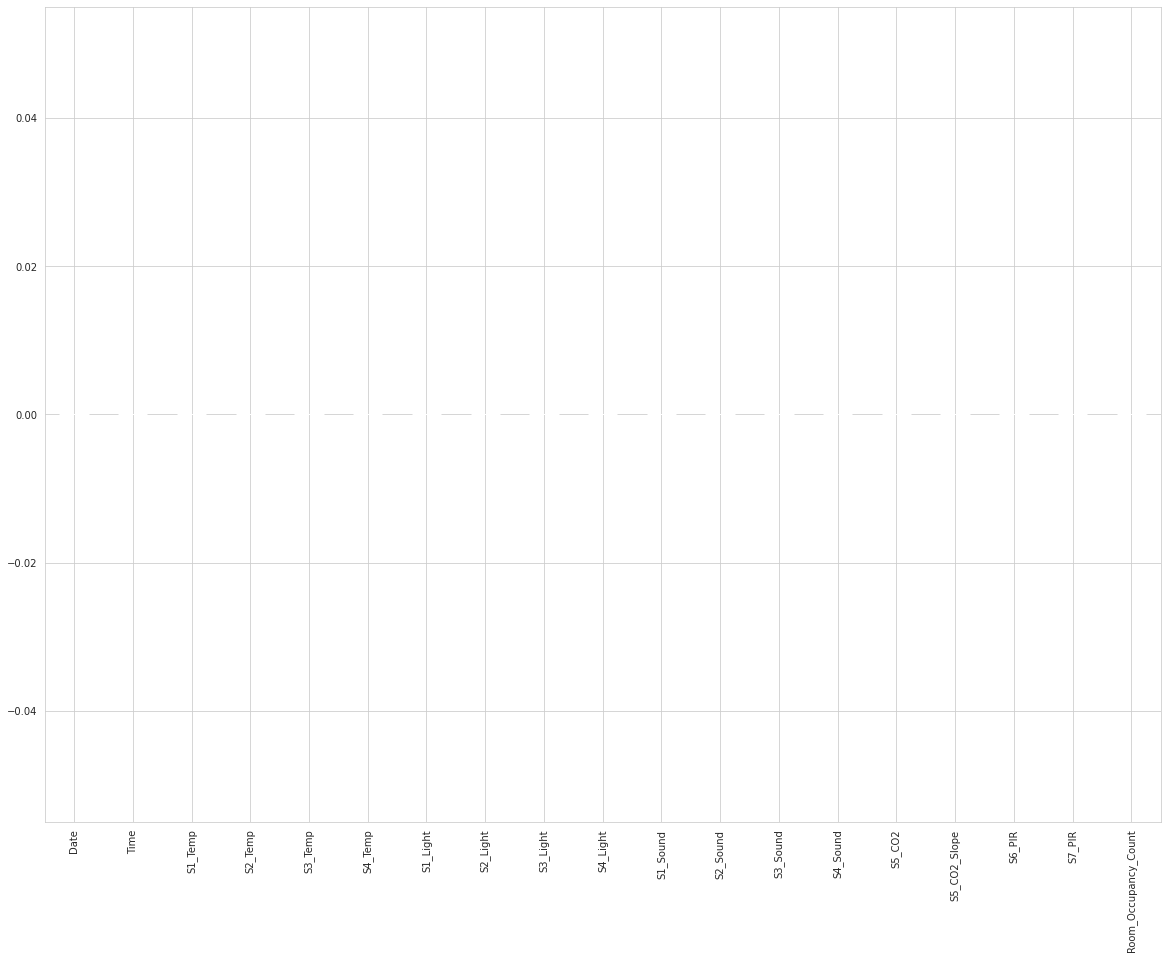

In [ ]:
df.isna().sum().plot.bar()

Appears to be no missing data

In [ ]:
print ("The shape of the data set before dropping duplicated:"+ str(df.shape))
df = df.drop_duplicates()
print ("The shape of the data set after dropping duplicated:"+ str(df.shape))

The shape of the data set before dropping duplicated:(10129, 19)
The shape of the data set after dropping duplicated:(10129, 19)


Apears to be no duplicate data

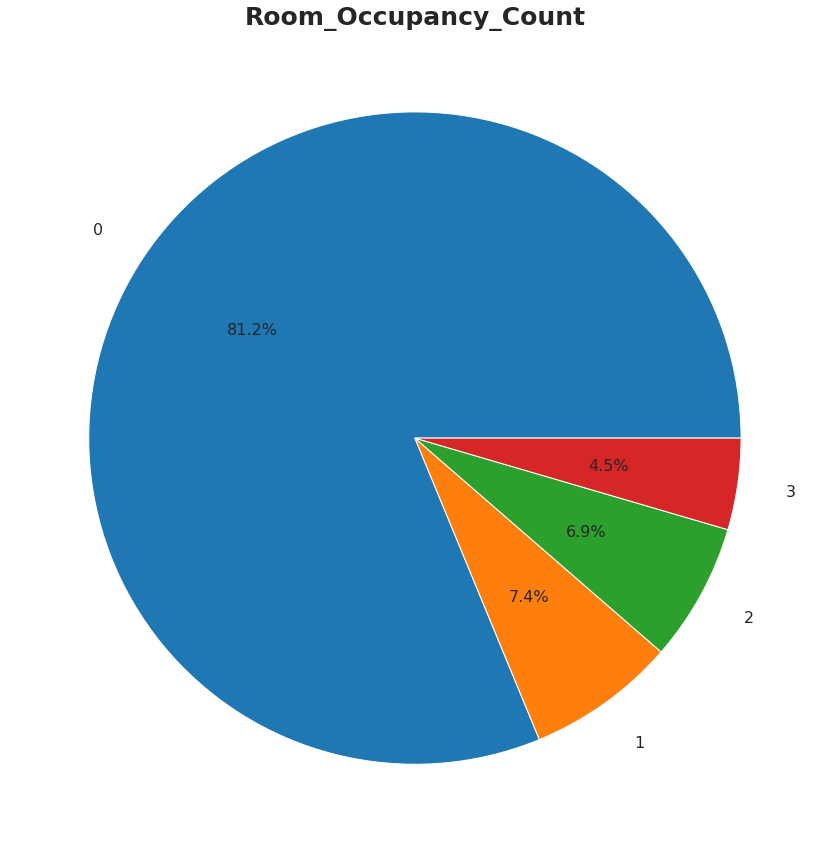

In [ ]:
# Pie chart - review dataset Room_Occupancy_Count relations/ratio
labels = ['0', '1', '2', '3']
ax = plt.pie(df['Room_Occupancy_Count'].value_counts(), labeldistance=1.15, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 16});
plt.title('Room_Occupancy_Count', fontsize=25, fontweight = 'bold')
plt.rcParams['figure.figsize'] = [20, 15]
plt.show()

Most of the data was gathered with no body in the room (~80%)

<AxesSubplot:>

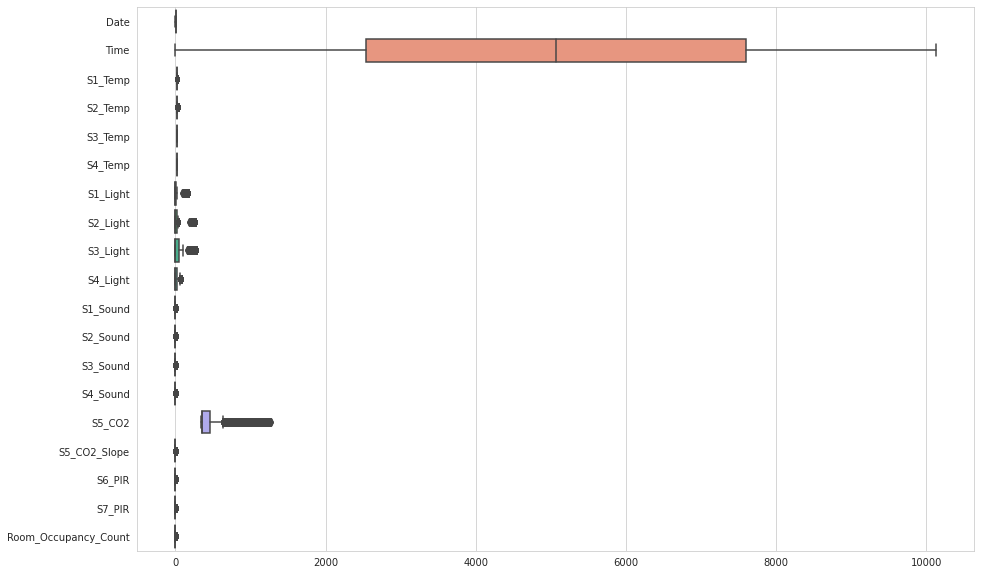

In [ ]:
plt.figure(figsize= (15,10))
sns.boxplot(data=df,orient="h")

There are some extreme values in S5_CO2.  Need to explore

<ipython-input-43-d9d54170e268>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df.corr(), dtype=np.bool)


Text(0.5, 1.03, 'Correlations Among Features')

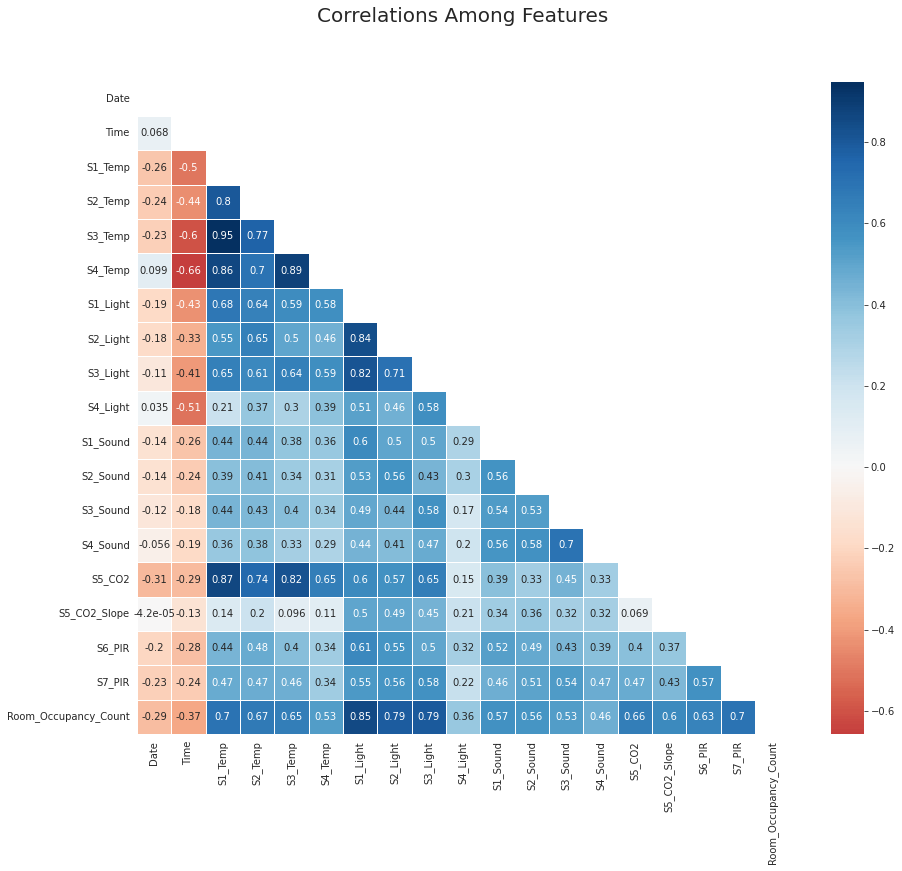

In [ ]:
## heatmeap to see the correlation between features. 
# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set_style('whitegrid')
plt.subplots(figsize = (15,12))
sns.heatmap(df.corr(), annot=True, mask = mask,
            cmap = 'RdBu', ## in order to reverse the bar replace "RdBu" with "RdBu_r"
            linewidths=.9, linecolor='white', fmt='.2g', center = 0, square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20, pad = 40)

According to the data:

* All of the temperature variables (S1_Temp, S2_Temp, S3_Temp, S4_Temp) are all highly correlated with each other
* Variable S1_Light is highly correlated to S2_Light and S3_Light
* Variable S2_Light is highly correlated to S3_Light 
* Variable S3_Sound is highly correlated to S4_Sound
* S5_CO2 is highly correlated to S1_Temp, S2_Temp, and S3_Temp


We will use the MLP (Multilayer Perceptron) model to map the sensor measurements to the binary occupancy labels.

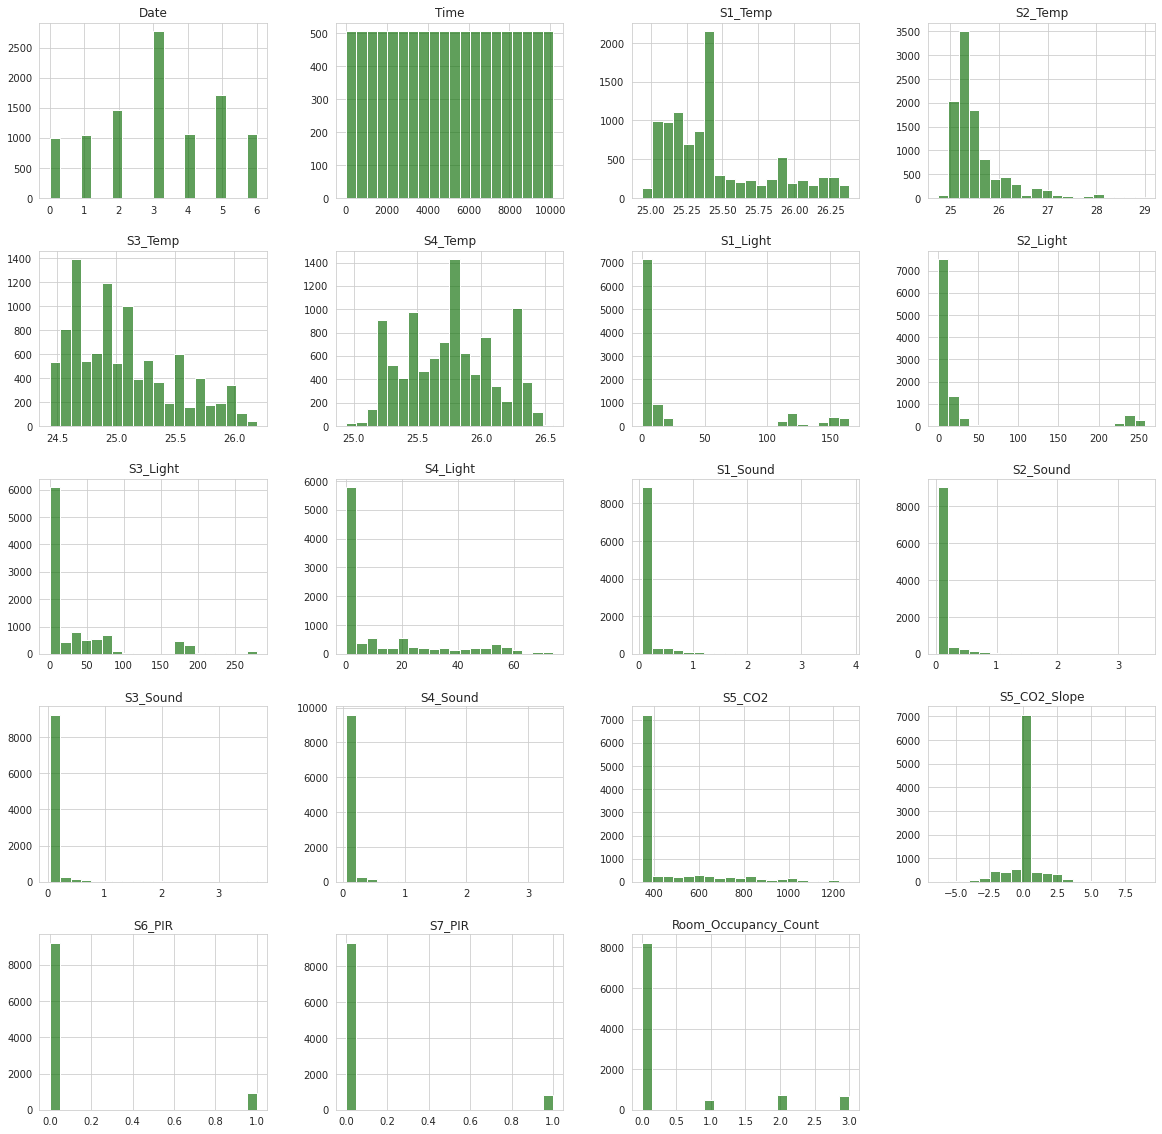

In [ ]:
#Numeric features distribution graphs
df.hist(figsize=(20,20),bins = 20, color="#107009AA")
plt.title("Numeric Features Distribution")
plt.show()

From these graphs we notice affirmation to some of our assumptions which is that for this version of the device release we do not need so many sensors duplicated, one of each should be enough. The final answers will be after doing the Deep Learning LSTM models and viewing the results. But here we can see that teh S6_PIR and S7_PIR have very similar results. Same for all of the S1 through S4 various sensors, the variations between them are very small.

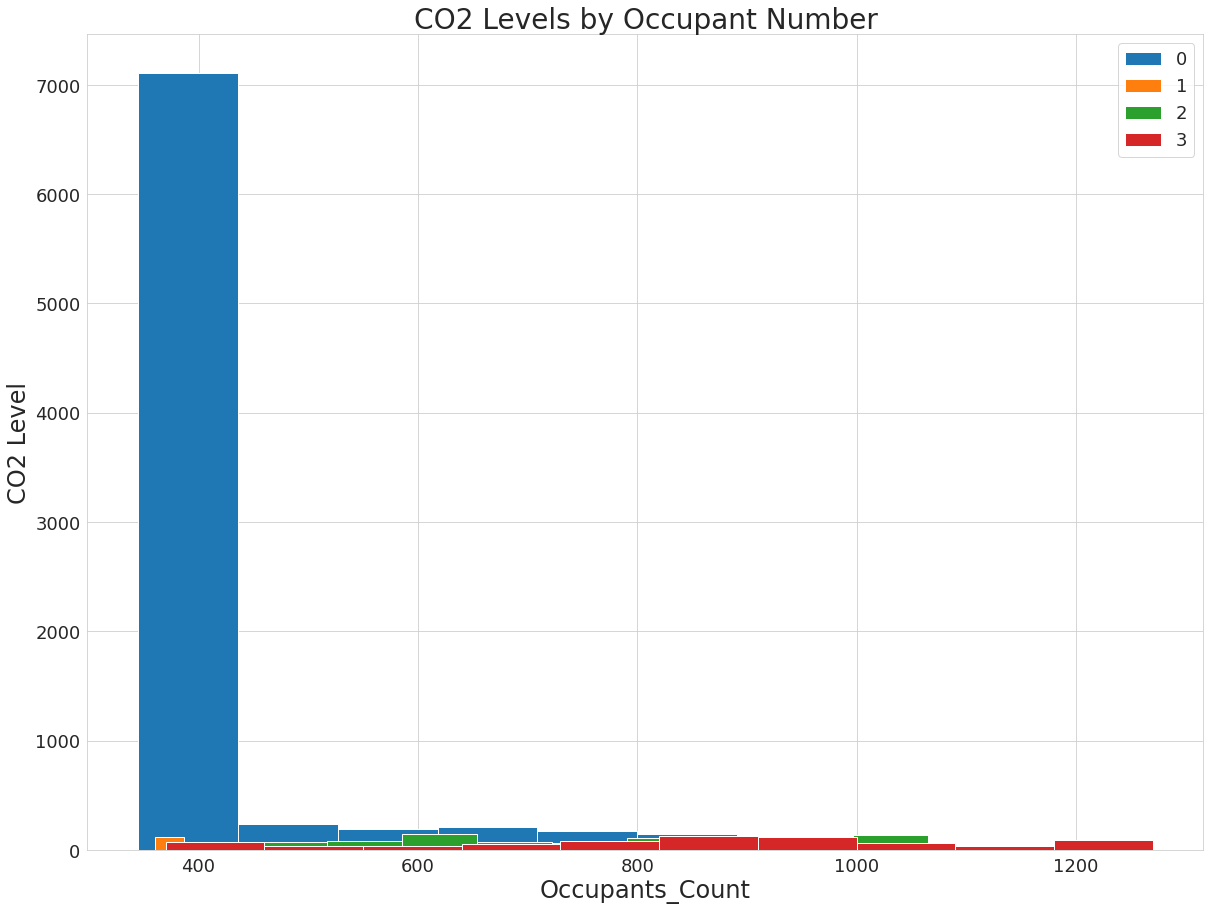

In [ ]:
#Since we have only one CO2 sensor we will evaluate this separately Plot by grouping of Occupant count and showing CO2 levels
df.groupby('Room_Occupancy_Count')['S5_CO2'].hist(legend=True)
plt.title('CO2 Levels by Occupant Number', fontsize=28)
plt.ylabel('CO2 Level', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Occupants_Count', fontsize=24)
plt.legend(fontsize=18)

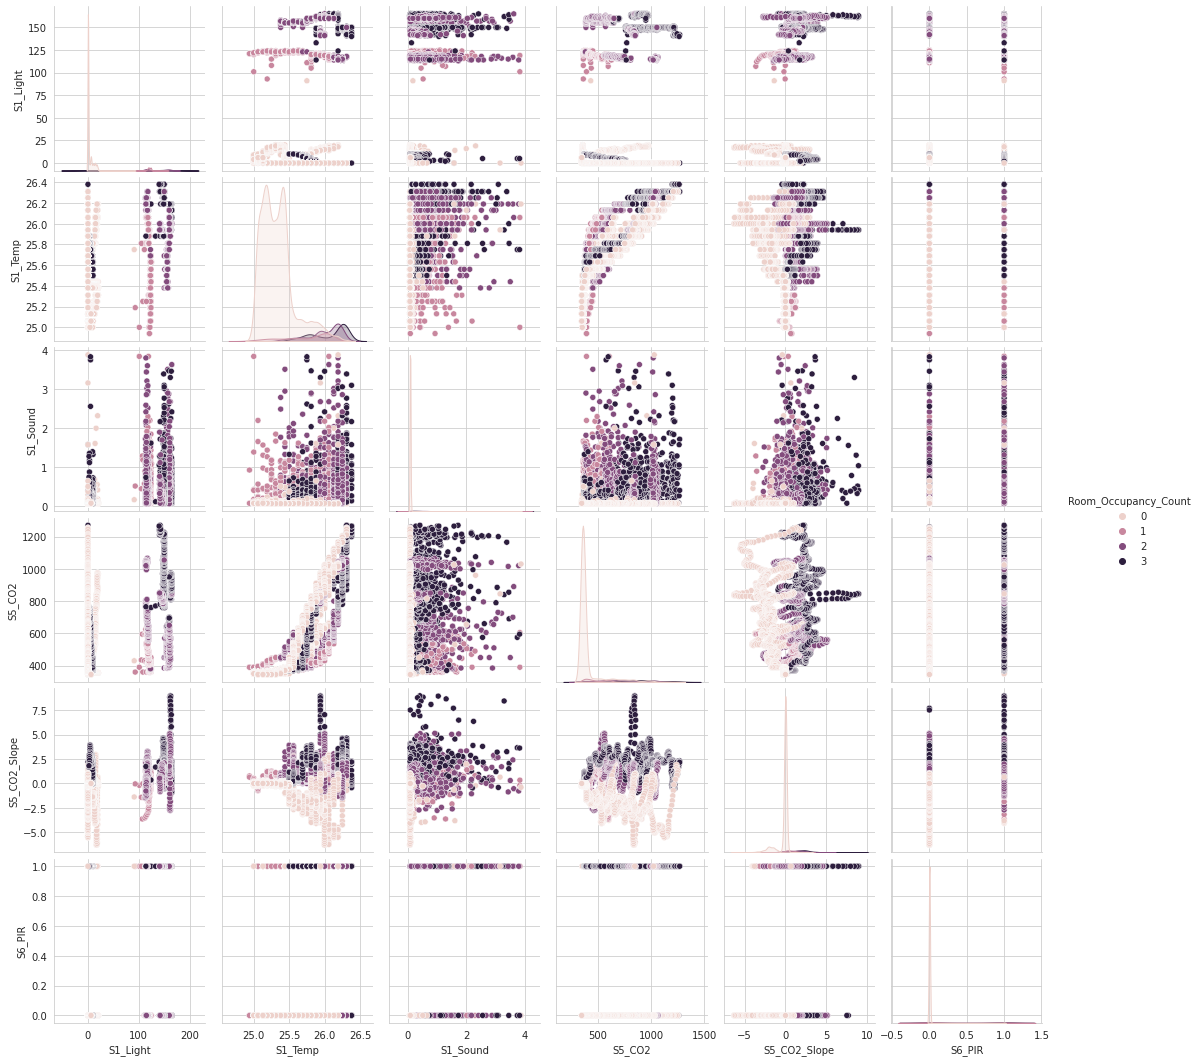

<Figure size 720x720 with 0 Axes>

In [ ]:
#View a plotted graph for additional information Model 2.0 sensors
#Load Seaborn for plot graphs
import seaborn as sns
sns.pairplot(df, vars=['S1_Light', 'S1_Temp', 'S1_Sound', 'S5_CO2',	'S5_CO2_Slope',	'S6_PIR'],hue='Room_Occupancy_Count')
fig_acc = plt.figure(figsize=(10, 10))
fig_acc.savefig("Sensor_Scatter_Plot.png")

## **Evaluation with MLP Prediction**

For Model 1.0 with multiple sensors

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score
import tensorflow as tf
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow import keras
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense

In [66]:
# Encode the date column using label encoding
le = LabelEncoder()
df_MLP['Date'] = le.fit_transform(df['Date'])
df_MLP['Time'] = le.fit_transform(df['Time'])

### All Sensors

In [144]:
# Split the data into input features and target variable
x = df_MLP.drop('Room_Occupancy_Count', axis=1)
y = df_MLP['Room_Occupancy_Count']

In [145]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [132]:
mlp = MLPRegressor(hidden_layer_sizes=(10,), activation='relu', solver='adam', random_state=42,max_iter=200, learning_rate_init=0.01)

In [146]:
mlp.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(10,), learning_rate_init=0.01, random_state=42)

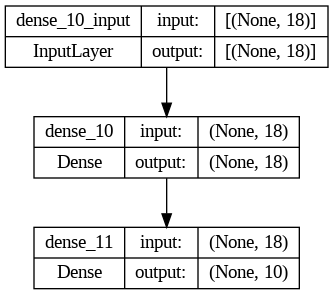

In [134]:
# Convert the MLPRegressor model to a Keras model in order to visualize the model
keras_model = Sequential()
for i, layer in enumerate(mlp.coefs_):
    if i == 0:
        keras_model.add(Dense(layer.shape[0], input_dim=X_train.shape[1], activation='relu'))
    else:
        keras_model.add(Dense(layer.shape[0], activation='relu'))
keras_model.compile(loss='mean_squared_error', optimizer='adam')

# Visualize the Keras model
plot_model(keras_model, to_file='mlp_s2.png', show_shapes=True, show_layer_names=True)

In [147]:
# Train the model
mlp.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(10,), learning_rate_init=0.01, random_state=42)

In [148]:
# Make predictions on the testing set
y_pred = mlp.predict(X_test)
y_pred_rounded = np.round(y_pred)

In [149]:
mse_all = mean_squared_error(y_test, y_pred_rounded)
mse_all_rounded = round(mse_all, 4)
print("MLP MSE accuracy:", mse_all_rounded, "Model 1.0")

MLP MSE accuracy: 0.9965 Model 1.0


In [150]:
#Calcualte the Prediction Accuracy in percent
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_pred_rounded)
accuracy_percentage = r_squared * 100
accuracy_percentage_rounded = round(accuracy_percentage, 4)
print("Accuracy percentage:", accuracy_percentage_rounded,"%", "Model 1.0")

Accuracy percentage: -21.5133 % Model 1.0


### *5 Main Sensors (S1_Light, S1_Sound, S1_Temp, S5_CO2, S6_PIR)*

In [163]:
X = df_MLP[['S1_Light','S1_Sound','S1_Temp','S5_CO2','S6_PIR']]
y = df_MLP['Room_Occupancy_Count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train MLP model
mlp = MLPRegressor(hidden_layer_sizes=(10,), activation='relu', solver='adam', random_state=42,max_iter=200, learning_rate_init=0.01)

mlp.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = mlp.predict(X_test)
y_pred_rounded = np.round(y_pred)

In [168]:
from sklearn.metrics import mean_squared_error
import tensorflow as tf

In [165]:
mse_all = mean_squared_error(y_test, y_pred_rounded)
mse_all_rounded = round(mse_all, 4)
print("MLP MSE accuracy:", mse_all_rounded, "Model 2.0")

MLP MSE accuracy: 0.0494 Model 2.0


In [166]:
#Calcualte the Prediction Accuracy in percent
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_pred_rounded)
accuracy_percentage = r_squared * 100
accuracy_percentage_rounded = round(accuracy_percentage, 4)
print("Accuracy percentage:", accuracy_percentage_rounded,"%","Model 2.0")

Accuracy percentage: 93.9815 % Model 2.0


### *Light Only (S1_Light)* Reason: This is the highest correlation, and we want to see if that could satisfy the design?

In [156]:
X = df_MLP[['S1_Light']]
y = df_MLP['Room_Occupancy_Count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train MLP model
mlp = MLPRegressor(hidden_layer_sizes=(10,), activation='relu', solver='adam', random_state=42,max_iter=200, learning_rate_init=0.01)

mlp.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = mlp.predict(X_test)
y_pred_rounded = np.round(y_pred)

In [158]:
mse_all = mean_squared_error(y_test, y_pred_rounded)
mse_all_rounded = round(mse_all, 4)
print("MLP MSE accuracy:", mse_all_rounded,"One S1_light sensor")

MLP MSE accuracy: 0.273 One S1_light sensor


### *Comparison*

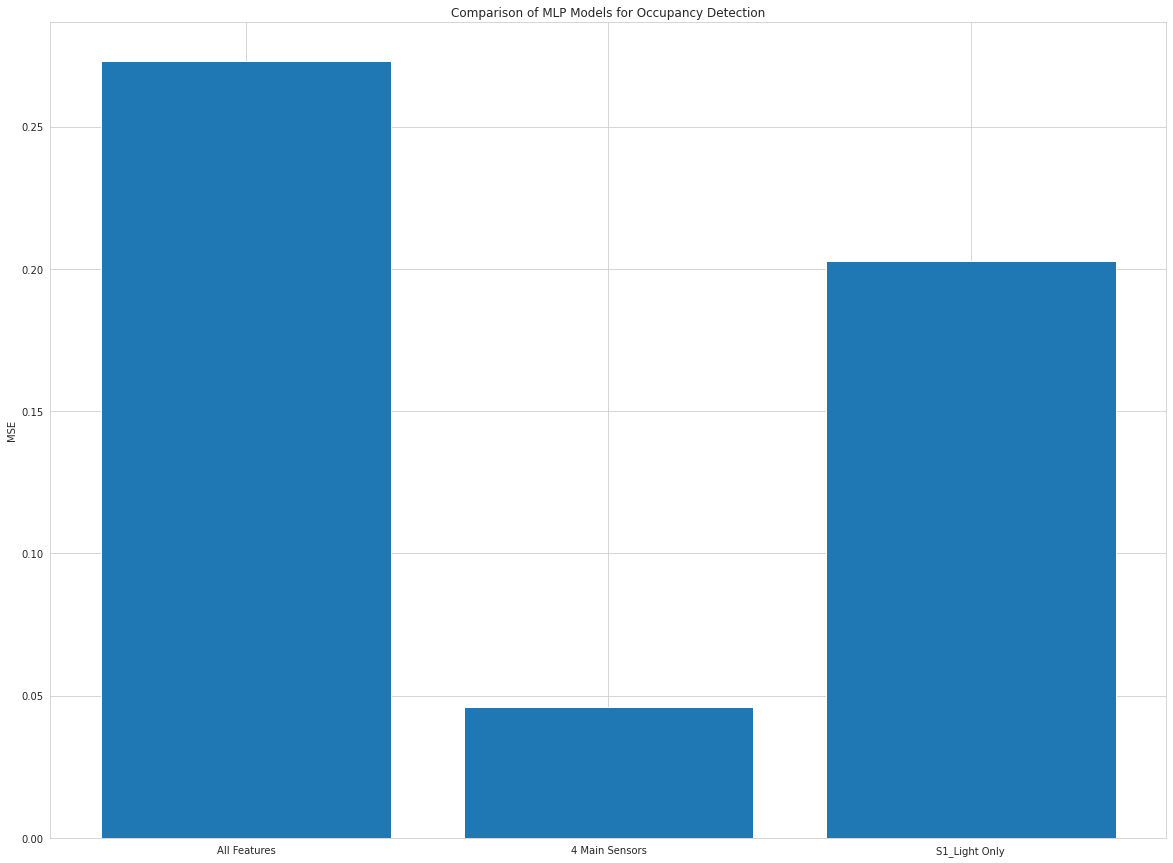

In [159]:
# Plot bar chart comparing MSE for both models
labels = ['All Features', '4 Main Sensors', 'S1_Light Only']
mse_values = [mse_all, mse_4_sensors,mse_light_only]
plt.bar(labels, mse_values)
plt.ylabel('MSE')
plt.title('Comparison of MLP Models for Occupancy Detection')
plt.show()

In [160]:
#Calcualte the Prediction Accuracy in percent
from sklearn.metrics import r2_score

# Make predictions on the testing set
y_pred = mlp.predict(X_test)
y_pred_rounded = np.round(y_pred)
r_squared = r2_score(y_test, y_pred_rounded)
accuracy_percentage = r_squared * 100
accuracy_percentage_rounded = round(accuracy_percentage, 4)
print("Accuracy percentage:", accuracy_percentage_rounded,"%", "one S1_Light sensor - test only for result/score compare")

Accuracy percentage: 66.7178 % one S1_Light sensor - test only for result/score compare


**LSTM with Time Prediction and Predicted Horizon (ph) (Model 2.0)**

In [182]:
# Import Libraries
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Dense, Dropout, LSTM
from keras.layers import LSTM, Input, Dense

In [172]:
#split the data into features (X) and target (y): scale down the amount of sensors
X = df_LSTM[['S1_Light', 'S6_PIR', 'S5_CO2', 'S5_CO2_Slope', 'S1_Temp', 'S1_Sound', 'Room_Occupancy_Count']]
y = df_LSTM['Room_Occupancy_Count']

In [174]:
#First improvement trial: Introduce folds into the input data
from sklearn.model_selection import KFold

k = 5 # number of folds (note: found 30 to be an ideal number)
kf = KFold(n_splits=k)
for train_index, val_index in kf.split(X): #occupancy is the full dataset
    X_train, y_train = X.iloc[train_index], X.iloc[val_index]

In [175]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [176]:
# print the shapes of the training and validation sets
print("Training set shape:", X_train.shape)
print("Validation set shape:", y_train.shape)

Training set shape: (8103, 7)
Validation set shape: (8103,)


In [177]:
#reset the indices for cleanliness
X_train = X_train.reset_index()
y_train = y_train.reset_index()

In [180]:
#Creating a nested list for the training data for the "Room_Occupancy_Count" value.
seq_arrays = []
seq_labs = []
seq_length = 200
ph = 1
feat_cols = ['Room_Occupancy_Count']

# Loop over each row in the training data
for i in range(len(X_train) - seq_length - ph):
    #Get the input sequence
    input_seq = X_train[feat_cols].values[i:i + seq_length]
    #Get the output target
    output_target = X_train[feat_cols].values[i + seq_length + ph]
    #Add the input sequence and output target to the arrays
    seq_arrays.append(input_seq)
    seq_labs.append(output_target)

# Convert the input and output arrays to numpy arrays
seq_arrays = np.array(seq_arrays, dtype=object).astype(np.float32)
seq_arrays = seq_arrays.reshape((seq_arrays.shape[0], seq_length, len(feat_cols)))
seq_labs = np.array(seq_labs, dtype=object).astype(np.float32)
assert (seq_arrays.shape == (len(X_train) - seq_length - ph, seq_length, len(feat_cols)))
assert (seq_labs.shape == (len(X_train) - seq_length - ph, 1))

In [183]:
#Build the LSTM model
# define path to save model
model_path = 'LSTM_model1.h5'

# build the network
nb_features = seq_arrays.shape[2] # number of features
nb_out = 1 # number of outputs

model = Sequential()

#add first LSTM layer
model.add(LSTM(
         input_shape=(seq_length, nb_features),
         units=5,
         return_sequences=True))
model.add(Dropout(0.2))

# add second LSTM layer
model.add(LSTM(
          units=3,
          return_sequences=False))
model.add(Dropout(0.2))

# Add dense layer (MLP)
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=nb_out, activation='relu'))
optimizer = keras.optimizers.Adam(learning_rate = 0.01)
model.compile(loss='mean_squared_error', optimizer=optimizer,metrics=['mse'])

print(model.summary())

# fit the network
history = model.fit(seq_arrays, seq_labs, epochs=100, batch_size=500, validation_split=0.05, verbose=2,
          callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='min'),
                       keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', save_best_only=True, mode='min', verbose=0)]
          )

# list all data in history
print(history.history.keys())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 200, 5)            140       
                                                                 
 dropout (Dropout)           (None, 200, 5)            0         
                                                                 
 lstm_1 (LSTM)               (None, 3)                 108       
                                                                 
 dropout_1 (Dropout)         (None, 3)                 0         
                                                                 
 dense_12 (Dense)            (None, 10)                40        
                                                                 
 dropout_2 (Dropout)         (None, 10)                0         
                                                                 
 dense_13 (Dense)            (None, 1)                